#    Quantitative Trading Project

## Cryptocurrency Quantile Trading on Volatility, NLP, and SOPR

========================================================================================================================

Cheng Hsuan Chiang 12283758

Richmond Frankeberger 12277572

Devin Kandage 12334114

Victor Wong 12283510

========================================================================================================================

### Project Outline

We present a quantitative trading strategy that attempts to profit from trading on cryptocurrencies based on traditional technical indicators, natural language processing signals, and relatively new cryptocurrency-specific indicators.

Given the high volatility and high asset appreciation in the cryptocurrency space, we find this investment class an attractive area in terms of pursuing high-return opportunities. Given the high risk associated with high volatility of the space, we attempt to reduce risk by finding combinations of diverse signals that best help to enhance returns.

Our strategy will be a quantile trading strategy based on a daily review of buy, sell, and hold signals on 12 cryptocurrencies. We will directly trade the top quantile coins, and we will replicate a short on the bottom quantile coins via the use of BTC futures.

### Investment Target:

For this project, we will analyze historical cryptocurrency prices and volumes from the period 2015 to present. We will also choose 10 cryptocurrencies that are included in the Bitwise 10 Crypto Index Fund (BBG Ticker: BITW US), a crypto-focused mutual fund with inception in 2017 and AUM currently of approximately \\$772M. Given the size and accessibility of this fund, we consider its holdings to be a representative allocation of what specific cryptocurrencies are in demand for the market as a whole - i.e. all financial constituents not limited to crypto-savvy investors. In addition, we also include 2 other cryptocurrencies - "meme-coins" that have accumulated significant asset appreciation. Lastly, we include BTC Futures - this will allow us to introduce shorting into our portfolio strategy.

Specifically, the names of the 12 cryptocurrencies in our investment universe (10 from BITW, 2 additional meme-coins) are: Bitcoin (BTC), Ethereum (ETH), Cardano (ADA), SOLANA (SOL), AVALANCHE (AVAX), POLKADOT (DOT), POLYGON (MATIC), COSMOS (ATOM), LITECOIN (LTC), CHAINLINK (LINK), DOGECOIN (DOGE), and SHIBA INU COIN (SHIB).

For BTC Futures, we will use the Binance perpetual futures contract from inception, and CME BTC Futures from inception (Dec-2017) up to the inception of Binance perpetual futures (Sep-2019). Perpetual contracts are currently available on multiple exchanges with plenty of liquidity - we will use Binance. The main benefit of a perpetual contract is that we will not have to worry about rolling our contracts and incurring excessive bid/offer costs in taking on exposure. We will of course take on bid/offer costs when resizing our position. For the purposes of backtesting, we assume that we can trade the CME BTC Futures on weekends.

### Evaluating Attractiveness of Potential Trades

Trades will be done with maximum frequency of once per day per available quantile slot. There will be three main categories for deciding whether to trade: traditional signals, natural language processing (NLP) signals, and cryptocurrency-specific signals.

<font size="5"> Traditional Signals </font>

<font size="4"> Volatility </font>

Asset price volatility is a key indicator as to how risky a particular asset is. It is defined as measure of price variability over certain period of time. In essence, it describes standard deviation of returns. In most cases, we assume volatility to be constant, which is clearly not true and numerous studies have been done to estimate this parameter, both in academia and industry.

Volatility is calculated by assuming equal weights to all of the returns measured over the period. We know that the mean return is quite small compared to the standard deviation. For an N-period with $\bar{r}\approx 0$ we have:
$$\sigma^{2} = \frac{1}{m}\sum_{i=1}^{n} r_{n-i}^{2}$$
where r is the return and $\sigma^{2}$ is the variance

Conditional heteroskedasticity refers to the notion that the next period’s volatility is conditional on the volatility in the current period as well as to the time varying nature of volatility. However, given the volatility dynamics, this model fail to fully capture the persistence of volatility.

We will be using a GARCH model to foreacast volatility estimates which will serve as an input to our model. We will be using a GARCH(1,1) model which is represented as $$\sigma_{n}^{2} = \omega + \alpha_{i}r_{n-i}^{2} + \beta_{i}\sigma_{n-i}^{2}$$

where $\alpha +\beta <1$ and $\omega +\alpha +\beta = 1$ which is the weight applied to the long run variance

The GARCH model helps specify the dependence of the time varying nature of volatility. The model incorporates changes in the fluctuations in volatility and tracks the persistence of volatility as it fluctuates around its long-term average and are exponentially weighted.

To model GARCH or the conditional volatility we use maximum likelihood estimation to find values for $\alpha$ , $\beta$ and $\omega$ by maximizing the likelihood fucntion.

Maximum Likeihood Estimation (MLE) is a statistical method used for fitting the data to a model. When using MLE, we first assume a distribution and then try to determine the model parameters. To estimate GARCH(1,1) parameters, we assume distribution of returns conditional on variance are normally distributed.

We maximize $$\sum_{i=1}^{n} log\left(\frac{1}{\sqrt{2\pi\sigma_{i}^2}} e^{\frac{(r_{i}-\bar r)^2}{2\sigma_{i}^{2}}}\right)$$ to derive $\alpha$ , $\beta$ and $\omega$.

For traditional signals, we will focus on evaluating volatility - specifically GARCH-related models. We will check if GARCH is an effective predictor of volatility.

<font size="4"> Sentiment signals : How Reddit Sentiment impacts Cryptocurrency Price </font>

<font size="3">1. Intuition behind our intention </font>

We want to analyze the social media sentiment has on the price of 12 Cryptocurrency Price. By utilizing the data we mined in the CryptoCurrency subreddit, we will evaluate the sentiment of the CryptoCurrency subreddit at a given day

<font size="2">Hypothesis</font>

Cryptocurrency price and Reddit sentiment follow the same distribution

<font size="3">2. Dataset from PushShift(Reddit API) </font> 

We datamines Reddit posts from the CryptoCurrency subreddit. We will use PushShift (wrapper for Reddit API) to retrieve all post submissions for each date from 2017/12 to 2022/2/28. It's about over a million posts on CryptoCurrency subreddit during this period.

<font size="3">3. Sentiment Scoring calculation based on VADER</font> 

Sentiment Analysis is a NLP technique used to evaluate the polarity of a given text to view if it is seen as 'positive' or 'negative'.
For example, words such as 'good' and 'happy' are regarded as positive words and if present in a sentence; it will increase the polarity of said sentence. On the contrary, negative words such as 'terrible' and 'sad' would reduce the polarity of the sentence. For our needs, we will take the titles of Reddit posts (e.g. "Bitcoin falls 7%") and calculate its sentiment (negative).

The **compound score** computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1(negative) and +1(positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a normalized, weighted composite score is accurate.

In this example we can see that **JP Morgan advises investors to allocate 1% on Bitcoin** on 2021/2/25 reddit Cryptocurrency subreddit has a 0.24 positive score, which indicates that it is a positive sentence. We will use the compound score for sentiment analysis.
A more clearer way - and the one we will be using - to see that if a sentence is negative or positive is to use its compound, as seen above. That is, the positive, neutral and negative scores are combined and normalized between -1 and 1. Where a score of -1 would indicate the text is extremely negative, and vice versa.


$$Bitcoin\;sentiment\;on\;2021/2/25 = \sum_{i=2021/2/25\;0:00:00}^{2021/2/25\;23:59:59} Sentiment\;Scoring\;based\;on\; VADER$$

<font size="4"> Cryptocurrency-Specific signals </font>

$$ SOPR = \frac{\sum_{spent\,outputs} quantity * price\,of\,token_{at\,spent}}{\sum_{spent\,outputs} quantity * price\,of\,token_{at\,creation}}$$

- When SOPR > 1, the owners of the spent outputs are in profit at the time of the transaction; otherwise, they are at a loss
- By plotting the SOPR of all spent outputs combined, aggregated by the day in which they were spent (using blockchain date), the graph can be produced
- SOPR appears to oscillate around the number 1
- During a bull market values of SOPR below 1 are rejected, while during a bear market values of SOPR above 1 are rejected. SOPR oscillator seems to serve as a reliable signal for identifying local tops & bottoms
- It means during a bull run, SOPR < 1 means market paricipants are over selling it in profit-taking and we should on dip, and vice versa
- Yellow = SOPR, Blue = BTC price in the below graph

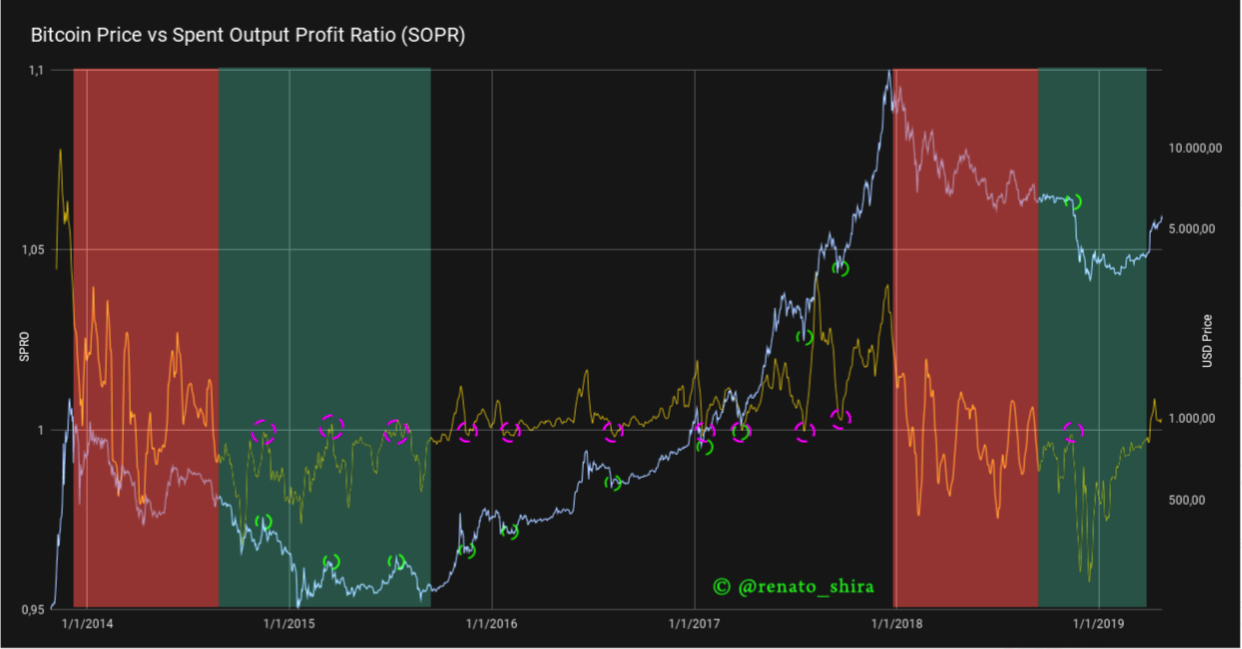

### SOPR with price trend of the underlying coin

#### 1. Determine the current trend of the coin
- We compare the 5-day simple moving average of the price with the 20-day simple moving average
- $SMA_{5d} > SMA_{20d}$ means underlying token is in an uptrend. Vice versa

#### 2. Get data from Glassnode API
- We extract SOPR for both BTC and ETH, the 2 largest and hence the most representative chains to gauge overall market sentiment

#### 3. Scailing the SOPR to -1 to 1
- Reading off SOPR itself does not give significant insights, it has to be used in combination with the current price trend

##### 3.1 In an up trend i.e. $SMA_{5d} > SMA_{20d}$, if people who are deeply ITM are taking profit, it might signals a short term top

##### BTC
- for an $SOPR$ ranging from $1.01$ to $1.08$, this corresponds to a $Score_{BTC}$ of $0$ to $-1$, assumed linear scale
- $Score_{BTC}$ is capped at $-1$ minimum when $SOPR > 1.08$
- $Score_{BTC} = 0$ otherwise

##### ETH
- for an $SOPR$ ranging from $1.05$ to $1.15$, this corresponds to a $Score_{ETH}$ of $0$ to $-1$, assumed linear scale
- $Score_{ETH}$ is capped at $-1$ minimum when $SOPR > 1.15$
- $Score_{ETH} = 0$ otherwise

Note that the score will be 0 for a positive SOPR under market down trend

##### 3.2 In a down trend: i.e. $SMA_{5d} < SMA_{20d}$, if people who are deep OTM are cutting loss, it might signals a short term bottom

##### BTC
- for an $SOPR$ ranging from $0.99$ to $0.95$, this corresponds to a $Score_{BTC}$ of $0$ to $+1$, assumed linear scale
- $Score_{BTC}$ is capped at $+1$ maximum when $SOPR < 0.95$
- $Score_{BTC} = 0$ otherwise

##### ETH
- for an $SOPR$ ranging from $0.95$ to $0.85$, this corresponds to a $Score_{ETH}$ of $0$ to $+1$, assumed linear scale
- $Score_{ETH}$ is capped at $+1$ maximum when $SOPR < 0.85$
- $Score_{ETH} = 0$ otherwise

Note that the score will be 0 for a negative SOPR under market up trend

#### 4. Derive different scores for different tokens
- For BTC: $Score_{final} = Score_{BTC}$
- For ETH: $Score_{final} = Score_{ETH}$
- For other tokens, we take the average of the sentiment from both BTC and ETH chains: $Score_{final} = \frac{Score_{BTC} + Score_{ETH}}{2}$

#### Potential caveats and improvement in the future
- For other tokens i.e. the altcoins, their sentiment can be complete unrelated to the main stream BTC/ETH. If we have more resources, potential improvement can be made if we can develop our own set of on-chain analytics by looking at the transactions of the individual coin and derive the individual SOPR
- Right now the scailing from SOPR to Score is simply based on historical range up till this point. A more dynamic scailing can be tested when the trading strategy is up and running
- A better algorithm can be used to determine current market trend instead of using simple moving average e.g. Average True Range, Bloomberg Trender etc.

### Investment Size, Position Entry/Exit Rules, and other Trading Strategy Details

For investment size, we will start with capital of \\$1m, and lever it 2x. Given the high volatility of cryptocurrencies, we do not want to lever up too much in order to avoid liquidity/stop loss issues, in particular with our short crypto replication via short BTCFUT. Further details will be provided in the next section on Stop Loss/Hedging/Cost.

Position Entry will be based on an aggregation of the signals in the above section, where equal weight is given to each signal. We will rank coins by their signal levels for each day of trading. Each signal will range from -1 to +1, where -1 indicates a strong sell and +1 indicates a strong buy.

Position Exit will be based on whether a different coin surpasses the quantile level of a coin that is being currently held.

Position Entry/Exit will happen on the close prices, which according to our datasources are 23:59 UTC + 00:00.

### Stop Loss, Hedging, and Cost Considerations

*Stop Loss*

Given the high level of volatility in the crypto space, we want to be able to have a stop-loss that is not too restrictive on investing due to short-term spikes in asset price changes. Also, given we will not be "shorting" any crypto, and obtaining short exposure via futures, we do not have to consider borrowing cost risk as we did in the spread-trading exercise. Therefore, we will make stop-loss a function of the 5% VaR of the GARCH 30-day prediction level.

In our strategy we take futures positions on margin. While we do have the capacity to take on 20x leverage from Binance with a theoretical upper limit of 125x. Our strategy has contingencies in place to ensure that we do not exceed a leverage multiple of 10x. 

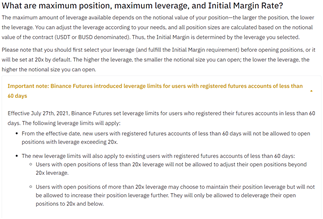

For example, with 20x leverage our portfolio value would be USD20m on USD1m of capital. Assuming this amount of leverage, it would take a 5% down move in the market would force us to liquidate our fund. This would impel us to immediately start with chapter 13 proceedings with federal authorities. However, there is minimal likelihood of this occurring due to our proprietary risk controls and framework (FWRCMP ©).
This enables us to considerably reduce the amount of leverage we take. The FWRCMP has allowed us to optimize the amount of leverage we take and is capped at 10x. This figure was arrived at by looking at the 3M ATM implied volatility on Bitcoin options.

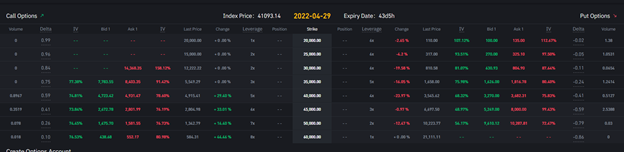

For instance, looking at the 3M ATM Bitcoin option, we see that the 3M IV (implied vol) is around 74% which corresponds to a 3.7% daily move. With 10x leverage a daily move of around 10% or an annualized vol of around 200% which seems highly unlikely given the current environment.

In conclusion, we believe that we have used relatively conservative risk estimates that allow us to help deliver alpha to our investors at a fraction of the risk compared to Bitcoin or BITW, and to embed a stop-loss strategy into the trading framework without having an external "stop loss level" that penalizes the strategy for reaching some arbitrary level, given our approach of maximizing risk and reward. Therefore, rather than having a stop-loss level, we stop trading when capital is depleted.


*Macro Hedge:* 

We will also want to include a macro hedge for the overall portfolio to shield from unexpected events that impact the whole financial market. Given volatility is a large attribute of cryptocurrencies, we will use SVXY as our macro hedge. On a monthly basis, the strategy will take a rolling 30 day regression of the portfolio return on that of VIX, and implement the hedge using SVXY.

*Costs:*

In terms of costs, the following are included in the net returns for the strategy:
1. The daily TED spread is applied on the USD1m leveraged borrowing for the portfolio.
2. Binance charges 3bps daily on Funding costs for futures. This is applied on the market value of futures.
3. Binance charges 10bps daily on bid/offer for market takers who trade less than USD 120m per month. This is applied, minus a friend referal rate of 1bp that we source for our fund.
4. Binance charges 2.88bps daily on bid/offer for market takes who trade less than USD 600m per month. This is applied, minus a friend referral rate of 10%.

Given this strategy only trades around \\$2m and is manageable just with four people, the fund we forego the consideration of having to set up a fund infrastructure. If we were to incur legal, prime broker, and custody fees

Crypto Trading Fees:

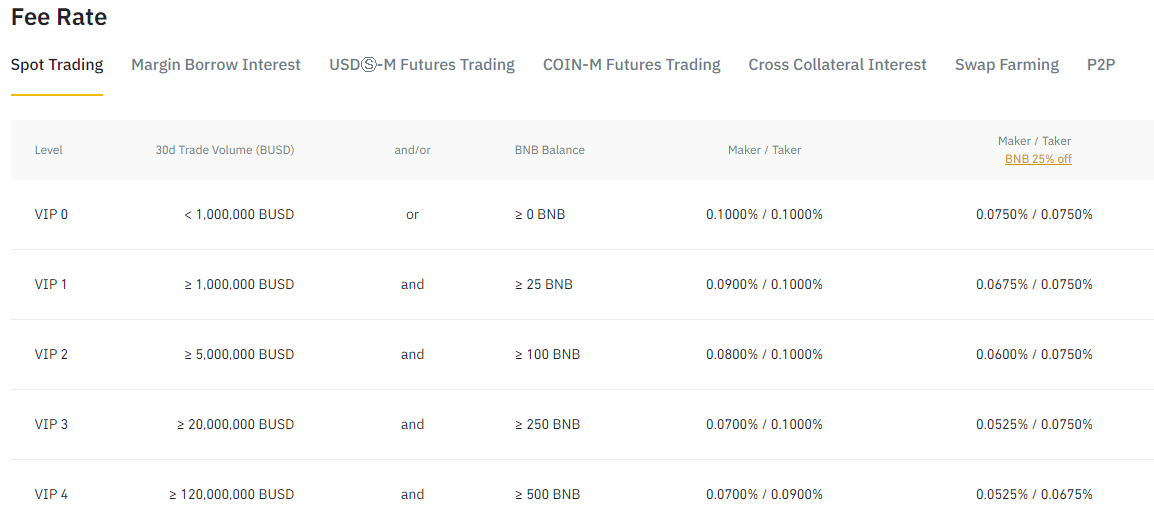


Futures Fees:

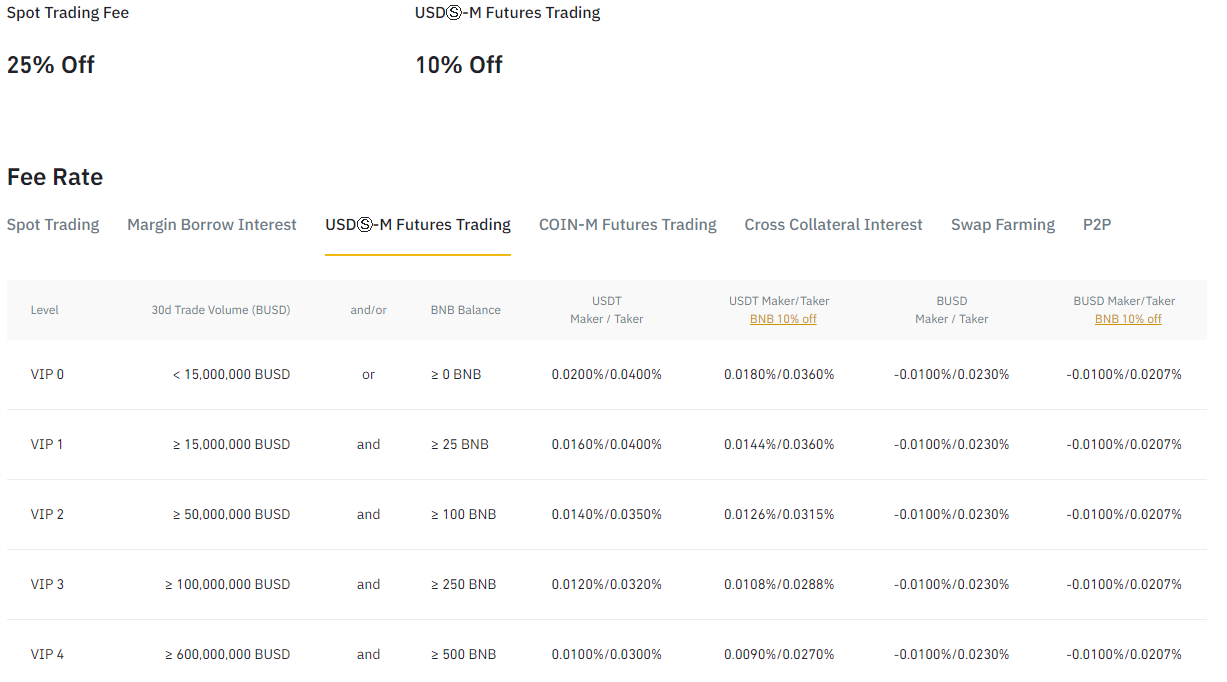



### Backtest Results

Our results show that the strategy achieves +\\$6.4m Gross, and +\\$6.0m Net PL (after costs). The strategy trades from the period that BTC futures are available to trade, December 2017, up to February 2022.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload
import CryptoQuantile_FIJI as bp

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 162.28it/s]


In [3]:
main_df = bp.BuildSignals()

100%|██████████████████████████████████████████████████████████████████████████| 18612/18612 [00:03<00:00, 5370.18it/s]


In [4]:
crypto_list = ['BTC-USD','ADA-USD','ETH-USD','SOL-USD','AVAX-USD','DOT-USD','MATIC-USD','LTC-USD','ATOM-USD','LINK-USD','DOGE-USD','SHIB-USD']
ticker_list = ['SPX','VIX','SVXY','BTC-USD','ADA-USD','ETH-USD','SOL-USD','AVAX-USD','DOT-USD','MATIC-USD','LTC-USD','ATOM-USD','LINK-USD','DOGE-USD','SHIB-USD','BTCFUT']
start = '2015-01-01'
end = '2022-02-20'
T0 = '2015-01-01'
T1 = '2017-12-01'
trade_amt = 2000000
symbol_list = ticker_list
crypto_list = crypto_list
freq = 1
colname = "Signal_Score"
q_l = 2
q_s = 2
h_l = 4
h_s = 4

In [5]:
TradingPL = bp.QuantileTrade(main_df,trade_amt,T0,T1,symbol_list,crypto_list,colname,freq,q_l,q_s,h_l,h_s)

LTD PL (Gross) for this strategy is 6416544.69927897
LTD PL (Net) for this strategy is 5978967.698995025


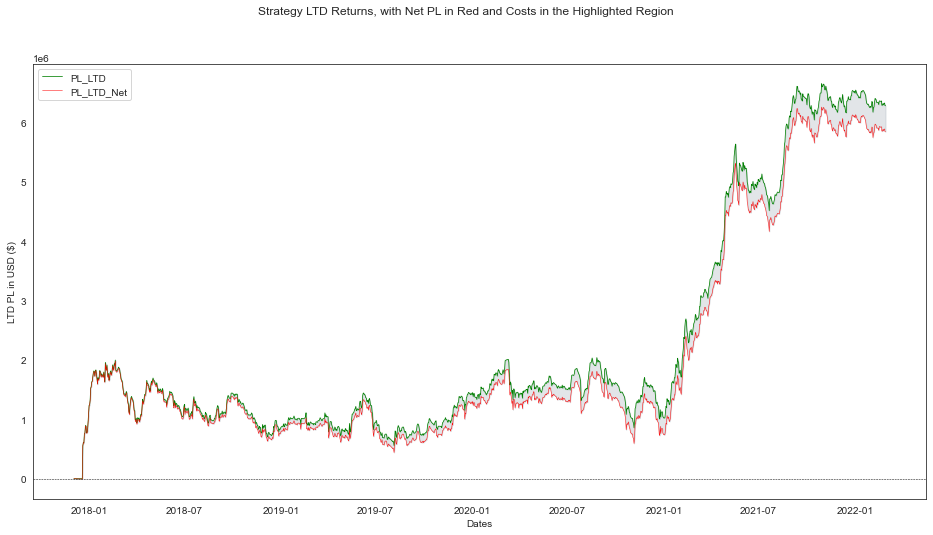

In [6]:
PL_Plot = TradingPL.groupby('trade dates').agg('min')[['PL_LTD','PL_LTD_Net']]
bp.PL_Plot(PL_Plot)

* The above plot shows the Life-to-date P&L (Green line) and the net life-to-date P&L (red line) of our strategy.
* The net life-to-date P&L is the P&L of our strategy which incorporates trading P&L AND costs. We see that the various b/o and funding costs have not been significantly punitive to the returns. 
* Over the four years of the strategy, only about \\$400k in costs are incurred, which is relatively small compared to the cumulative PL.

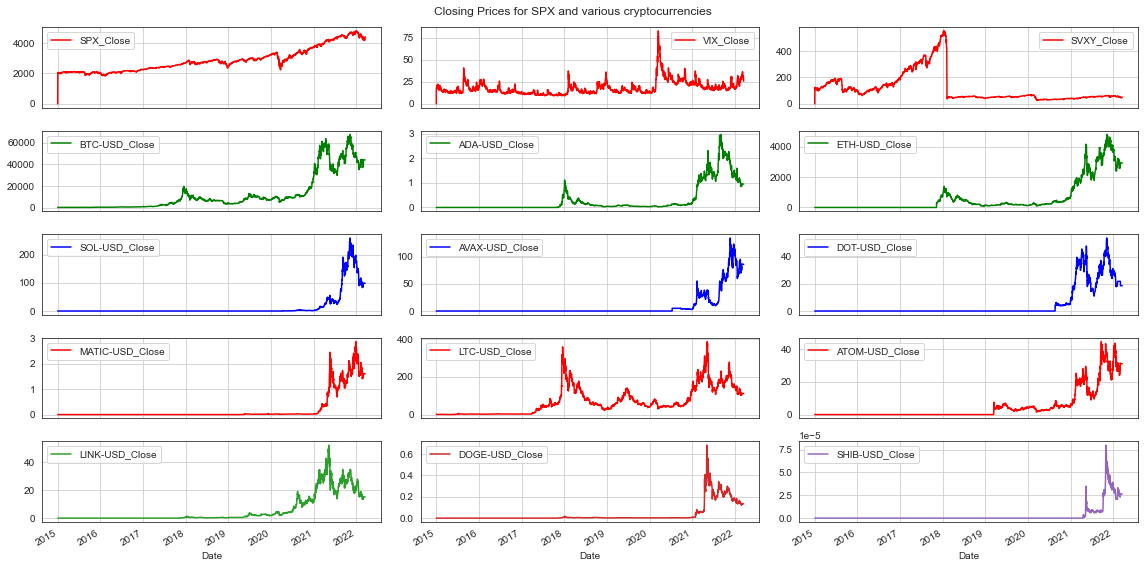

In [7]:
bp.close_data_plot()

No handles with labels found to put in legend.


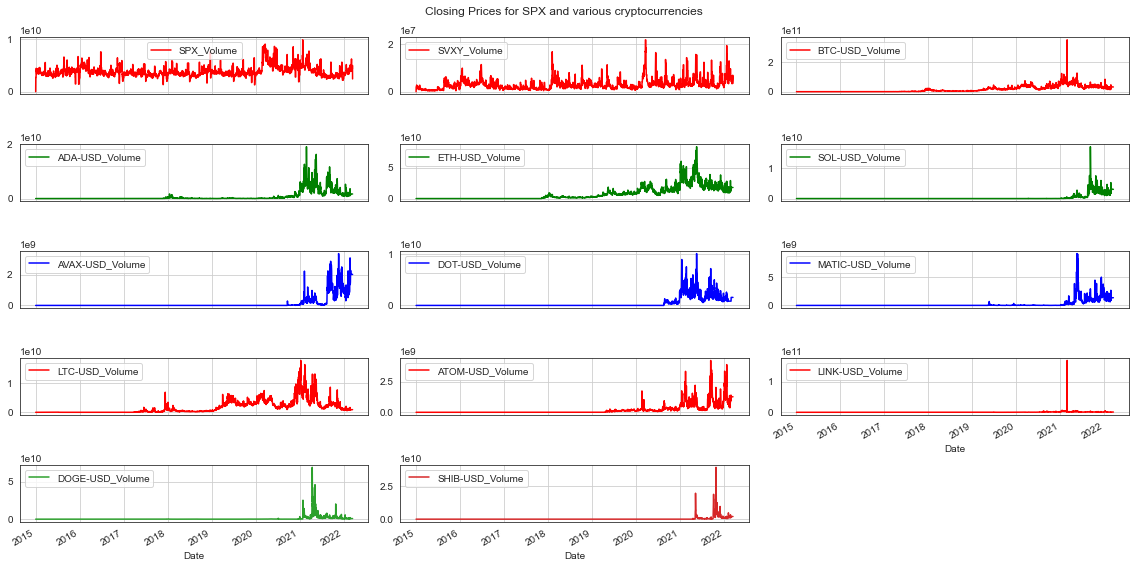

In [8]:
bp.volume_data_plot()

No handles with labels found to put in legend.


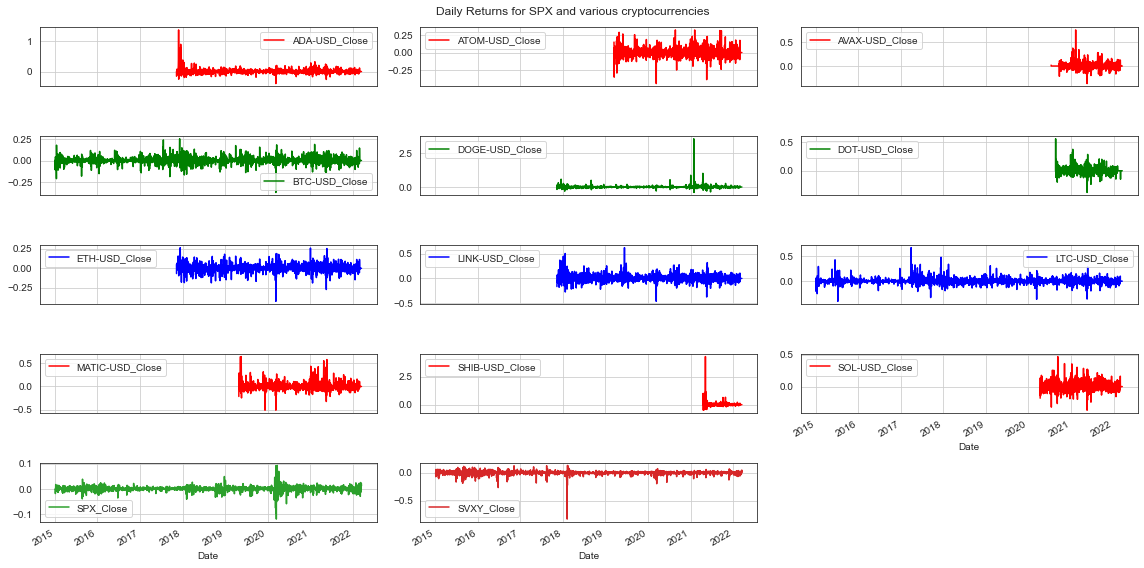

In [9]:
bp.close_excl_vix()

# Analysis of strategy results

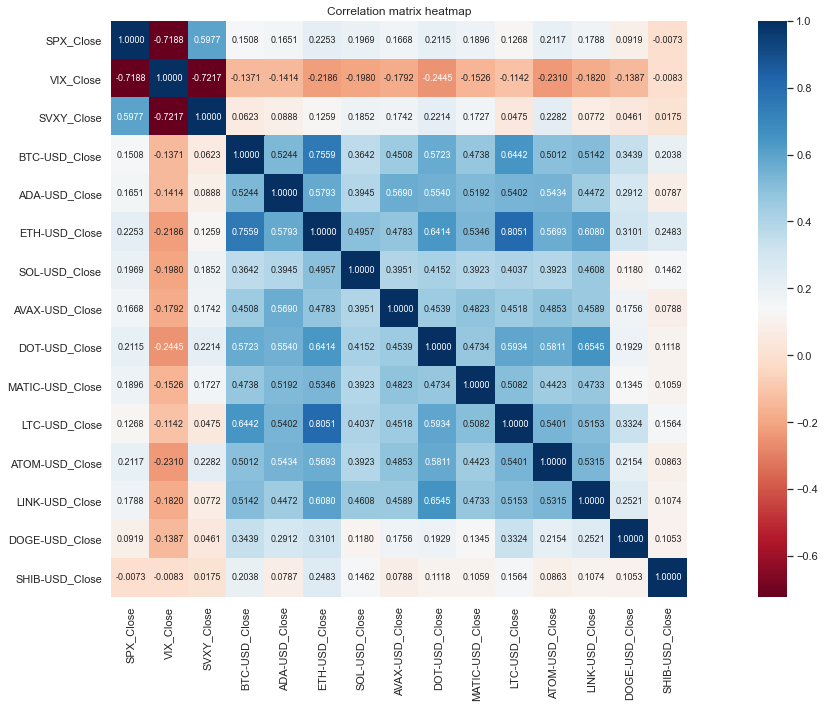

In [10]:
bp.corr_heatmap()

* The correlation heatmap shows how each of the coins and our hedging instuments behave with respect to each other. We see that most of the coins have siginificant amount of correlation with each other. HOwever of particular interest is the correlation with the S&P 500, VIX and SVXY.
* We see that the cryptocurrencies exhibit low correlation with the S&P 500, this leads us to believe that it would be an effective diversifier in a large portfolio which consists of more traditional asset classes such as equities or fixed income.
* The VIX has negative correlation with the rest of the cryptocurrencies, although this correlation is small. 
* Finally the correlation of SVXY versus the rest of the cryptocurrencies have very low positive correlations, this leads us to belive that the SVXY would be able to neutralize movements in our portfolio effectively provide we take the appropriate hedge ratio which is estimated via linear regression on a 30 day basis.

## Comparison to benchmarks

 <strong>Explaination of Benchmarks</strong>
* As cryptocurrencies are a relatively new asset class, the availability of benchmarks to compare our strategy against are fairly limited. We constructed our own benchmarks to evaluate if our strategy would perform better or worse against them.
* We have chosen Bitcoin, BITW, an equally weighted portfolio and an equal risk contribution portfolio to evaluate our strategy.
* Bitcoin was chosen as it was one of the first cryptocurrencies to be widely used and traded, and also has the longest tenure. It was also chosen because in the crypto markets it is akin to a buy and hold strategy (HODL (Hold on to dear life) strategy).
* BITW is a Crypto Index Fund, which tracks the 10 most highly valued cryptocurrencies weighted by market cap. This was another index we wanted to compare with as it hold 10/12 coins in our portfolio. And is similar to the S&P500 for stocks.
* The equally weighted portfolio is constructed using the age old of heurisitic of $\frac{1}{N}$ or naive diversification, the paper by DeMiguel et al. showed that a  $\frac{1}{N}$ would generally outperform other types of porfolio construction/strategies in absolute return terms. We wanted to see if this particular fact held for the cryptoScurrency market as well.
* The equal risk contribution portfolio is constructed by allocating equal amounts of risk across each of the assets, this again is another take on the $\frac{1}{N}$ approach but from a risk point of view as funds/investment managers often have a risk budget and this seeks to optimize the allocations of risk to provide the best return.


In [11]:
benchmark = bp.benchmark_portfolios(TradingPL)
perfmet   = bp.performanceMetrics(benchmark,365)
perfmet

[*********************100%***********************]  2 of 2 completed


,Mean,Vol,Sharpe,VaR (0.05),Min,Max,Expected_Shortfall (5%),Skewness,Excess Kurtosis
BITW_return,0.718264,1.386883,0.517898,-0.083024,-0.330983,0.705644,-0.134850,3.167493,28.645769
BTC_return,0.876400,0.743133,1.179331,-0.060091,-0.371695,0.252472,-0.090427,-0.133456,7.225774
Equal_Risk_Contribution,1.145932,1.049488,1.091896,-0.080805,-0.314075,0.257894,-0.127663,-0.438381,5.292984
Equally_Weighted_Return,1.716654,1.150951,1.491509,-0.083433,-0.330528,0.382018,-0.131532,0.253742,8.609156
PTF_Val,0.401699,0.380894,1.054620,-0.025303,-0.089740,0.278811,-0.039208,2.256085,27.287341


* Looking at the table above we see that in absolute return terms the equally weighted portfolio offered the best returns, however we see that it has much higher levels of risk.
* Our strategy (PTF_Val) has achieved a sharpe ratio of around 1.05, while it may not be that high compared to Bitcoin or the equally weighted portfolio, we see that from a risk point of view it has performed very well.
* We see that our strategy has the lowest VaR at the 5% level, the same can be said for the expected shortfall where it is almost lower by almost a factor of 4, this can be attributable to types of cross hedges we take to gain exposure to cryptocurrencies when we go short on them and the macro hedge we implement to neutralize movements.
* Our dispersion of returns which can be seen by the min and max columns, is also much lower meaning while the returns maybe more volatile compared to traditional asset classes, our strategy maybe more tolerable to investors who do not wish to be exposed to wildness of Bitcoin.
* Looking at the skewness, we see that our strategy and BITW offer positive skew compared to the other benchmarks. This postive skew leads us to believe that we have more positive returns in our distribution compare to the heurisitic portfolios and compared to the Bitcoin.
* The excess kurtosis of both our strategy and BITW are fairly high compared to the other benchmarks. This means there is more mass in the tails, combined with the positive skewness, leads us to believe that on average our strategy can generate sustained periods of above average perfomance.

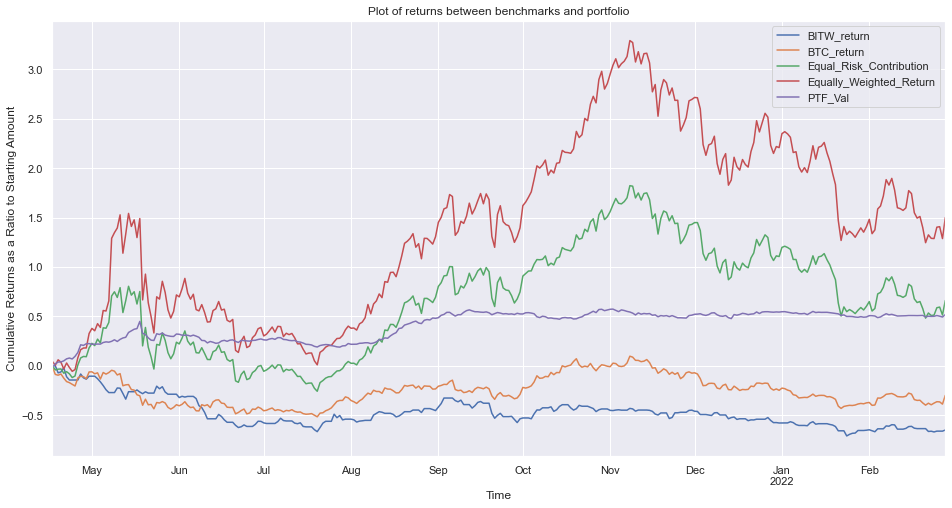

In [12]:
((1+benchmark.dropna()).cumprod()-1).plot()
bp.plt.title('Plot of returns between benchmarks and portfolio')
bp.plt.ylabel('Cumulative Returns as a Ratio to Starting Amount')
bp.plt.xlabel('Time')
bp.plt.show()

* For the period from 2021 to February 2022 where we have data on BITW, BTC, and the portfolio, we can see that our strategy outperforms both BTC and BITW. Its return is on par with an equal risk contribution portfolio, but underperforms the equally weighted portfolio.

Text(0.5, 1.0, 'Kernel density plot of Daily percentage returns BTC')

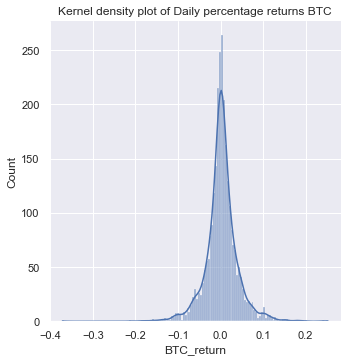

In [13]:
#see if we can overlay on top of each other
bp.sns.displot(data=benchmark, x="BTC_return", kde=True)
bp.plt.title('Kernel density plot of Daily percentage returns BTC')

Text(0.5, 1.0, 'Kernel density plot of Daily percentage Strategy Returns')

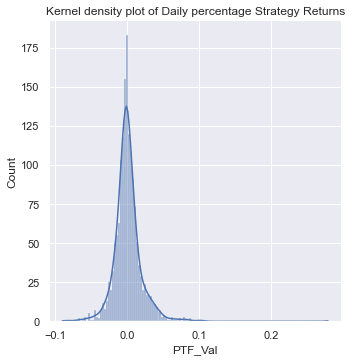

In [14]:
bp.sns.displot(data=benchmark, x="PTF_Val", kde=True)
bp.plt.title('Kernel density plot of Daily percentage Strategy Returns')

 <strong>Drawdown Levels Throughout the Life of the Strategy</strong>

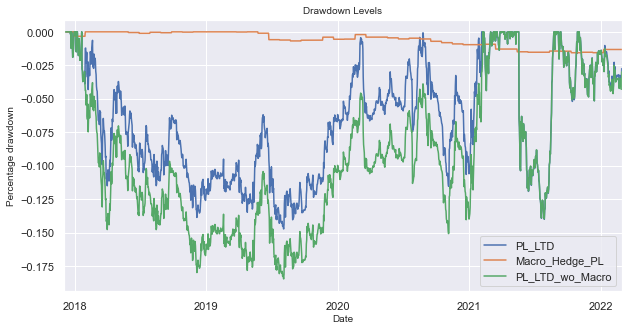

In [15]:
bp.plot_drawdown(TradingPL,benchmark)

* The maximum drawdown tells us the maximum observed loss from a peak to a trough of a portfolio. It is an indicator of how bad things can get over a specified time interval.
* We see that our total P&L which includes the macro hedge (Blue line), does much better than the P&L without the macro hedge (green line). This is to be expected and we can safely conclude that our macro hedge does indeed help reduce the level of the loss of our portfolio, however interestingly this advantage disappears after 2021, leading us to believe that period was not conducive to our macro hedge.

 <strong> Fama-French Factors</strong>

In [16]:
bp.FF_factors(TradingPL)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PTF_Val   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.649
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           0.000772
Time:                        20:07:16   Log-Likelihood:                 2436.5
No. Observations:                1005   AIC:                            -4865.
Df Residuals:                    1001   BIC:                            -4845.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.185      0.236      -0.001       0.002
Mkt-RF         0.0015      0.001      3.027      0.003       0.001       0.003
SMB            0.0023      0.001      2.388      0.017       0.000       0.004
HML           -0.0001      0.001     -0.216      0.829      -0.001       0.001
==============================================================================
Omnibus:                      684.180   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36295.296
Skew:                           2.472   Prob(JB):                         0.00
Kurtosis:                      32.023   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We also regress our portfolio returns on the Fama-French factors to see if there are any similarities between our strategies and the factors. What we see is that our strategy does not have anything in common with the Fama-French factors which shows that our strategy does not follow the path of traditional asset classes. This also means that it can be effective in altering the composition of investment portfolio and another reason why JP Morgan advises investors to allocate 1% to Bitcoin.

 <strong>Information Ratio</strong>

* The information ratio is the ratio of the active return of the portfolio divided by the tracking error of the portfolio. It is measured relative ot a benchmark.
* In this case we have used two benchmarks which are currently traded on the market, Bitcoin and the BITW index

In [17]:
bp.information_ratio("BTC_return",TradingPL)

[*********************100%***********************]  2 of 2 completed
Using BTC_return as the benchmark


,Alpha,Beta,R_Squared,Information Ratio
Equal_Risk_Contribution,0.003521,1.168214,0.713257,0.119695
Equally_Weighted_Return,0.005095,1.198808,0.624513,0.138005
PTF_Val,0.000952,0.085805,0.031127,0.048524


* Using Bitcoin as the benchmark we see that our strategy has the lowest information ratio, which means we may not be delivering better performance compared to using an equally weighted or equal risk contribution portfolio, however we believe that and information ratio of 0.04 is still quite reasonable.
* When we look at the statistical measures we see that both equally weighted and equal risk contribution portfolios have high $R^{2}$ and $\beta \approx 1$ meaning that most of variation in portfolios can be explained using the benchmark. However when we look at our strategy's return we see a very low  $R^{2}$ which tells us that Bitcoin is unable to attribute an explaination to our performance.
* Both these inferences lead us to believe that our strategy can add value even though it maybe incremental to an investor who consider Bitcoin an appropriate benchmark.

In [18]:
bp.information_ratio("BITW_return",TradingPL)

[*********************100%***********************]  2 of 2 completed
Using BITW_return as the benchmark


,Alpha,Beta,R_Squared,Information Ratio
Equal_Risk_Contribution,0.004488,0.578180,0.212143,0.092035
Equally_Weighted_Return,0.006081,0.590835,0.184194,0.111750
PTF_Val,0.002176,0.014415,0.004050,0.130300


* Using BITW index as the benchmark we see that our strategy has the highest information ratio, which means we may be delivering better performance compared to using an equally weighted or equal risk contribution portfolio
* When we look at the statistical measures we see that both equally weighted and equal risk contribution portfolios have high $R^{2}$ and $\beta \approx 0.58$ meaning that some of variation in portfolios can be explained using the benchmark. However when we look at our strategy's return we see a very low  $R^{2}$ which tells us that Bitcoin is unable to attribute an explaination to our performance.
* Both these inferences lead us to believe that our strategy can add substantial value to an investor who considers the BITW index an appropriate benchmark.

 <strong>Downside Beta</strong>

We would like to see how our strategy would do when markets are volatile, as market downturns tend to increase the correlations across the market and would drag the overall global economy down as well.

The downside beta will help measure how correlated our strategy is to market downturns.

In this we will measure the downside beta using both Bitcoin and the BITW index as the market

The downside beta is calculated as 

$$\beta^{-} = \frac{Cov(r_{i},r_{m}|r_{m}<u_{m})}{Var(r_{m}|r_{m}<u_{m})}$$

In [19]:
bp.downside_beta("BTC_return",benchmark)

Using BTC_return as the benchmark


,Downside Beta,p-value
PTF_Val,0.178671,2.810395e-12
Equally_Weighted_Return,1.497911,2.397359e-38
Equal_Risk_Contribution,1.442130,1.022641e-43


* Looking at coefficient and p-value of the downside beta we see that our strategy has the lowest coefficient compared to the other benchmarks. This means that our portfolio is not as sensitive to days when the market (Bitcoin) has negative returns. This again shows that the risk of our portfolio is fairly well controlled and siginificantly reduces the impact of downturns on our portfolio.
* Also not that the small p-values lead us to believe that our coefficients are extremetly significant.

In [20]:
bp.downside_beta("BITW_return",benchmark)

Using BITW_return as the benchmark


,Downside Beta,p-value
PTF_Val,0.040880,0.174221
Equally_Weighted_Return,0.416788,0.017835
Equal_Risk_Contribution,0.429346,0.009698


* Looking at coefficient and p-value of the downside beta we see that our strategy has the lowest coefficient compared to the other benchmarks. This means that our portfolio is not as sensitive to days when the market (BITW Index) has negative returns. This again shows that the risk of our portfolio is fairly well controlled and siginificantly reduces the impact of downturns on our portfolio.
* Also not that the p-values are small for both benchmarks and not for our portfolio while lead us to believe that our the downside beta coefficient is not siginificantly different from zero which means that our portfolio is not at all sensitive to downturns in the BITW index.

 <strong>Cointegration Test</strong>

In [21]:
#double check the coefficient
bp.cointegration_test("BTCFUT")

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 307.62it/s]


,BTC-USD,ADA-USD,ETH-USD,SOL-USD,AVAX-USD,DOT-USD,MATIC-USD,LTC-USD,ATOM-USD,LINK-USD,DOGE-USD,SHIB-USD
Engle_Granger Stat,-29.083809,-23.945172,-13.172798,-27.429532,-10.7025,-11.238597,-19.582076,-17.792474,-32.969889,-17.705283,-10.213774,-inf
P-value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Result,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated,Cointegrated


* In our strategy we have provisions to take short positions in coins when our indicators indicate it may be favorable to do so. However an issue we run into is that we can not take short positions in these coins as it is infeasible to take such a position. So in order to take advantage of this view, we utilize a cross hedge using Bitcoin futures as we saw in the correlation heatmap that most of the coins are exhibit fairly high positive correlation. The amount of Bitcoin futures we take will be determined by a linear regression using the returns of that coin versus the returns on the Bitcoin futures over that period.
* To evaluate if this is feasible or not we also check to see if the series is cointegrated. Cointegration is a technique used to find if there is possible correlation between times series processes in the long-run.
* We use the Engle-Granger test to see if there is cointegration across the returns of each coin versus the returns on bitcoin futures.
* We see that all the series are cointegrated with the Bitocoin futures, implying that there is a long-run relationship between them. This gives us reasonable confidence in using the Bitcoin futures as our cross hedge to take positions in the cryptocurrencies we are shorting.

# Conclusion

- This project analyses the use of traditional technical indicators, natural language processing signals, and relatively new cryptocurrency-specific indicators. Specifically, our strategy has achieved a sharpe ratio of around 1.05 which shows that our strategy can be effective in executing a view that one has using a ratio or parameter of choice.

- In terms of the strategies analyzed, from a risk point of view, our strategy has the lowest VaR at the 5% level, the expected shortfall lower by almost a factor of 4, and offers positive skew compared to the other benchmarks. From a return point of view, our strategy does not have anything in common with the Fama-French factors and Information Ratio shows that our strategy add substantial value to an investor who considers the BITW index an appropriate benchmark.

- With regard to further exploration, one parameter that was not experimented with the above analysis was including more cryptocurrencies for example extending our list of 12 cryptocurrencies to 100 cryptocurrencies. Making this very wide would make the portfolio more dynamic and more flexibility. Another interesting area to look at would be including 2bps trading costs on SVXY. But we have included plenty of other costs, such as bid/offer fees for crypto/Bitcoin futures, funding on borrowings, etc. Lastly, to see how these strategies perform compared to the other market(S&P Cryptocurrency Indices) - if we take the Information Ratio with respect to the market, how does the performance change?

- The results of our strategy support the view that quantile trading strategy with macro hedge can be effective - choosing the right signal and direction are essential for this to work, but optimizing supporting parameters can effectively calibrate the strategies as well.

##### Appendix/References


https://dataguide.cryptoquant.com/utxo-data-indicators/spent-output-profit-ratio-sopr

https://medium.com/unconfiscatable/introducing-sopr-spent-outputs-to-predict-bitcoin-lows-and-tops-ceb4536b3b9

https://towardsdatascience.com/sentiment-analysis-for-stock-price-prediction-in-python-bed40c65d178

https://www.binance.com/en/support/faq/360033162192

https://www.binance.com/en/fee/futureFee

https://www.binance.com/en/fee/trading

https://www.binance.com/en/margin/interest-history

* López de Prado, Marcos, A Robust Estimator of the Efficient Frontier (October 15, 2016). Available at SSRN: https://ssrn.com/abstract=3469961 or http://dx.doi.org/10.2139/ssrn.3469961
* Optimal Versus Naive Diversification:How Inefficient is the 1/NPortfolio Strategy? DeMiguel et al.
* Optimal Execution of Portfolio Transactions (December 2000) Robert Almgren and Neil Chriss
* Bitcoin: Potential Savings as a Substitute for Traditional Remittance Systems (September 2014) Richmond Minami Frankeberger
* A Critical Analysis of Volatility Surprise in Bitcoin Cryptocurrency and Other Financial Assets (November 2021) Doumenis et al.